## Overall Structure 

1. Import Libraries 
2. Overview of using ML

## 1. Import libraries

In [20]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for data exploration
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats to 2 decimals

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [21]:
credit_data = pd.read_csv('cleaned-dataset.csv',index_col= 0)
credit_data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Monthly Income,Debt-to-Income Ratio,Credit Utilization Ratio
0,Fully Paid,445412.00,Short Term,709.00,1167493.00,7-9 years,Home Mortgage,Big Purchase,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,0.00,97291.08,0.05,0.55
3,Fully Paid,347666.00,Long Term,721.00,806949.00,2-3 years,Own Home,Debt Consolidation,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,0.00,67245.75,0.13,0.66
6,Fully Paid,217646.00,Short Term,730.00,1184194.00,0-1 year,Home Mortgage,Debt Consolidation,10855.08,19.60,13.00,1.00,122170.00,272052.00,1.00,0.00,98682.83,0.11,0.45
8,Fully Paid,548746.00,Short Term,678.00,2559110.00,2-3 years,Rent,Debt Consolidation,18660.28,22.60,4.00,0.00,437171.00,555038.00,0.00,0.00,213259.17,0.09,0.79
9,Fully Paid,215952.00,Short Term,739.00,1454735.00,0-1 year,Rent,Debt Consolidation,39277.75,13.90,20.00,0.00,669560.00,1021460.00,0.00,0.00,121227.92,0.32,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,Fully Paid,251020.00,Long Term,700.00,648508.00,7-9 years,Rent,Debt Consolidation,7836.17,11.20,3.00,0.00,352659.00,418374.00,0.00,0.00,54042.33,0.15,0.80
19995,Fully Paid,89100.00,Short Term,703.00,1077414.00,7-9 years,Rent,Essential Needs,15173.59,19.90,10.00,0.00,272688.00,362912.00,0.00,0.00,89784.50,0.17,0.75
19997,Fully Paid,550418.00,Long Term,675.00,1134072.00,2-3 years,Home Mortgage,Debt Consolidation,13325.27,29.40,5.00,0.00,77634.00,102850.00,0.00,0.00,94506.00,0.14,0.75
19998,Fully Paid,91124.00,Short Term,709.00,1349266.00,2-3 years,Rent,Debt Consolidation,26422.92,11.00,14.00,0.00,69787.00,340956.00,0.00,0.00,112438.83,0.23,0.20


## 2. Overview of using ML

Classification Report:
              precision    recall  f1-score   support

 Charged Off       0.50      0.00      0.00       443
  Fully Paid       0.81      1.00      0.89      1866

    accuracy                           0.81      2309
   macro avg       0.65      0.50      0.45      2309
weighted avg       0.75      0.81      0.72      2309

Accuracy: 0.8081420528367259


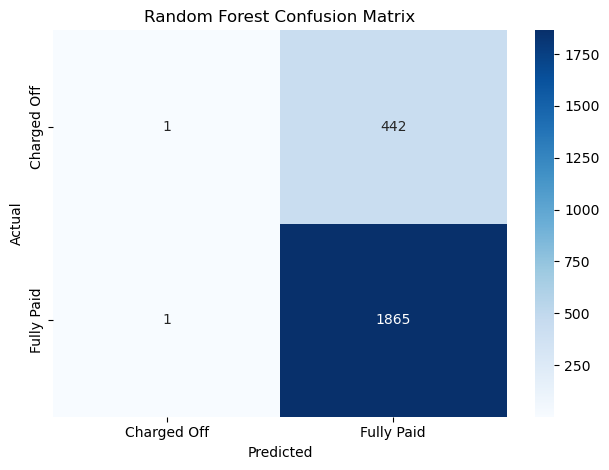

In [22]:
# Define columns
numerical_columns = [
    'Current Loan Amount', 'Credit Score', 'Annual Income', 
    'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 
    'Number of Credit Problems', 'Current Credit Balance', 
    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'
]

categorical_columns = [
    'Term', 'Years in current job', 'Home Ownership', 'Purpose'
]

# Load your dataset here (replace this with your actual DataFrame)
# credit_data = pd.read_csv("your_dataset.csv")

# Drop rows with missing values
credit_data_clean = credit_data[numerical_columns + categorical_columns + ['Loan Status']].dropna()

# Features and target
X = credit_data_clean[numerical_columns + categorical_columns]
y = credit_data_clean['Loan Status']

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        random_state=42
    ))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

Observations:

This model identified all the Fully Paid cases but missed most of the Charged Off cases - 476 cases were misclassified as Fully Paid.

It is skewed toward Fully Paid because that's the majority class. 0.28 recall score for Charged Off also indicates that this model is not useful in helping us identify risky loans.

Something new we explored:
1. RF with SMOTE (Synthetic Minority Over-Sampling Technique) - SMOTE Creates synthetic samples of the minority class to balance the dataset
2. RF with Class Weight
3. RF using both techniques

In [23]:
# before this, run pip install imbalanced-learn in terminal
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [24]:
smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=200, max_depth=15, min_samples_split=10, random_state=42
    ))
])

# Train
smote_pipeline.fit(X_train, y_train)
y_pred_smote = smote_pipeline.predict(X_test)

In [25]:
weight_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200, max_depth=15, min_samples_split=10,
        class_weight='balanced', random_state=42
    ))
])

# Train
weight_pipeline.fit(X_train, y_train)
y_pred_weight = weight_pipeline.predict(X_test)

In [26]:
smote_weight_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(
        n_estimators=200, max_depth=15, min_samples_split=10,
        class_weight='balanced', random_state=42
    ))
])

# Train
smote_weight_pipeline.fit(X_train, y_train)
y_pred_smote_weight = smote_weight_pipeline.predict(X_test)

NameError: name 'y_pred_both' is not defined

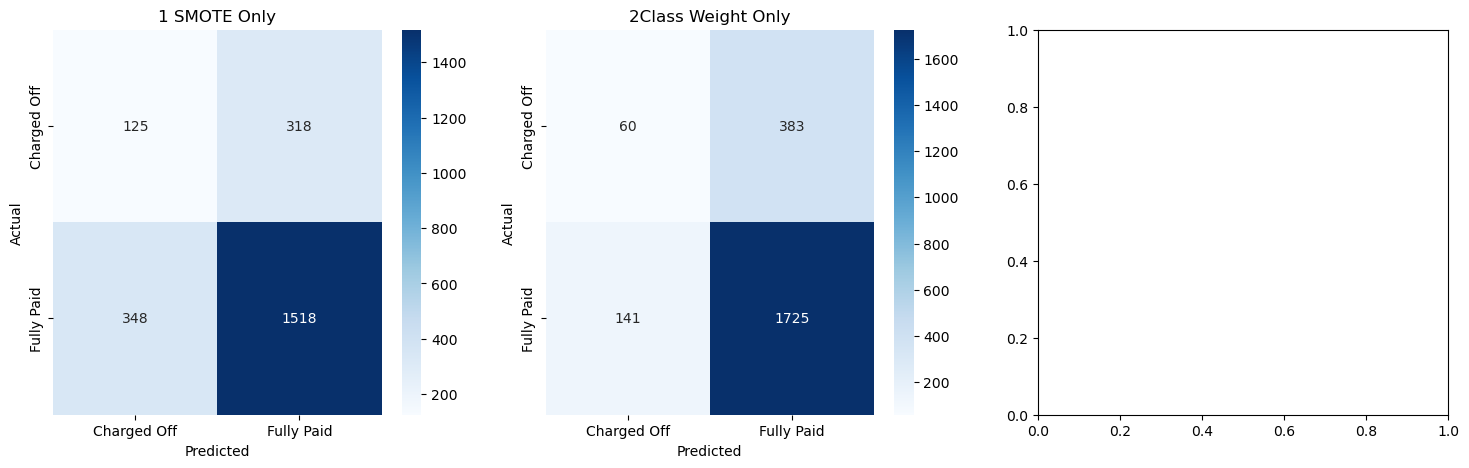

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SMOTE
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("1️ SMOTE Only")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Class Weight
sns.heatmap(confusion_matrix(y_test, y_pred_weight), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("2️Class Weight Only")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

# Both
sns.heatmap(confusion_matrix(y_test, y_pred_both), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[2])
axes[2].set_title("3️ SMOTE + Class Weight")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
print("SMOTE Only Report:")
print(classification_report(y_test, y_pred_smote, target_names=label_encoder.classes_))

print("Class Weight Only Report:")
print(classification_report(y_test, y_pred_weight, target_names=label_encoder.classes_))

print("SMOTE + Class Weight Report:")
print(classification_report(y_test, y_pred_both, target_names=label_encoder.classes_))

SMOTE Only Report:
              precision    recall  f1-score   support

 Charged Off       0.26      0.28      0.27       443
  Fully Paid       0.83      0.81      0.82      1866

    accuracy                           0.71      2309
   macro avg       0.55      0.55      0.55      2309
weighted avg       0.72      0.71      0.72      2309

Class Weight Only Report:
              precision    recall  f1-score   support

 Charged Off       0.30      0.14      0.19       443
  Fully Paid       0.82      0.92      0.87      1866

    accuracy                           0.77      2309
   macro avg       0.56      0.53      0.53      2309
weighted avg       0.72      0.77      0.74      2309

SMOTE + Class Weight Report:


NameError: name 'y_pred_both' is not defined

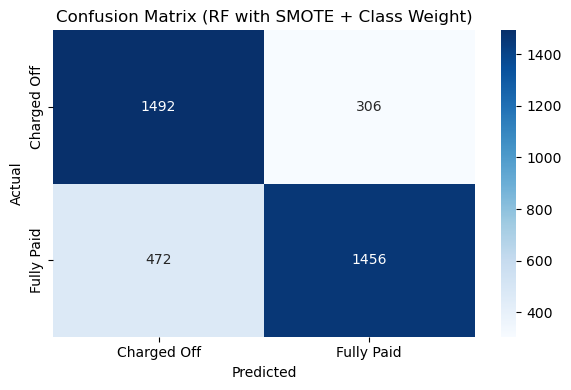

Classification Report:

              precision    recall  f1-score   support

 Charged Off       0.76      0.83      0.79      1798
  Fully Paid       0.83      0.76      0.79      1928

    accuracy                           0.79      3726
   macro avg       0.79      0.79      0.79      3726
weighted avg       0.79      0.79      0.79      3726


Accuracy: 0.7911969940955448


In [28]:
# Re-importing necessary packages after reset

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define columns
numerical_columns = [
    'Current Loan Amount', 'Credit Score', 'Annual Income', 
    'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 
    'Number of Credit Problems', 'Current Credit Balance', 
    'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'
]

categorical_columns = [
    'Term', 'Years in current job', 'Home Ownership', 'Purpose'
]

# Drop rows with missing values for selected features and target
credit_data_clean = credit_data[numerical_columns + categorical_columns + ['Loan Status']].dropna()

# Prepare X and y
X = credit_data_clean[numerical_columns + categorical_columns]
y = credit_data_clean["Loan Status"]

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# Fit and transform X before SMOTE
X_preprocessed = preprocessor.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y_encoded)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest with class_weight='balanced'
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (RF with SMOTE + Class Weight)")
plt.tight_layout()
plt.show()

print("Classification Report:\n")
print(report)
print("\nAccuracy:", accuracy)

Observations:

Using SMOTE alone saw a improvement in recall for Charged Off to 0.53 which means it our model is now flagging out more risky cases. However, there is also an increase in false positives. Class Weight alone has the best accuracy at 0.82. Adding Class Weight to SMOTE had no value add

Perform K-means for selected features only (reduce dimensionality)

-- avoid including 2 features that have very strong correlations (from heat map above)

-- include term and purpose for categorical since they differ more significantly between fully paid and charged off

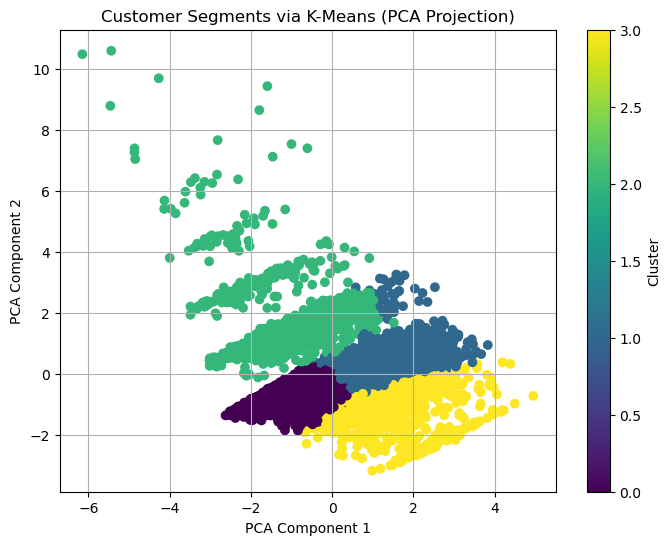

Cluster Summary:
         Number of Credit Problems  dti  loan_income_ratio  \
Cluster                                                      
0                             0.00 0.13               0.17   
1                             0.01 0.22               0.36   
2                             1.20 0.16               0.22   
3                             0.01 0.19               0.21   

         Current Credit Balance  
Cluster                          
0                     188174.22  
1                     295127.72  
2                     161669.23  
3                     941508.55  


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Feature engineering
credit_data['dti'] = credit_data['Monthly Debt'] / (credit_data['Annual Income'] / 12)
credit_data['loan_income_ratio'] = credit_data['Current Loan Amount'] / credit_data['Annual Income']

# Step 2: Define features
numerical_features = ['Number of Credit Problems', 'dti', 'loan_income_ratio', 'Current Credit Balance']
categorical_features = ['Term', 'Purpose']

# Step 3: Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Step 4: Build KMeans pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('cluster', KMeans(n_clusters=4, random_state=42))
])

# Step 5: Fit the model
kmeans_pipeline.fit(credit_data)
credit_data['Cluster'] = kmeans_pipeline.named_steps['cluster'].labels_

# Step 6: Visualize using PCA
X_preprocessed = preprocessor.fit_transform(credit_data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=credit_data['Cluster'], cmap='viridis')
plt.title('Customer Segments via K-Means (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Step 7: Cluster profile summary
summary = credit_data.groupby('Cluster')[
    ['Number of Credit Problems', 'dti', 'loan_income_ratio', 'Current Credit Balance']
].mean()

print("Cluster Summary:")
print(summary)

In [30]:
default_rate = credit_data.groupby('Cluster')['Loan Status'].value_counts(normalize=True).unstack()
print(default_rate)

Loan Status  Charged Off  Fully Paid
Cluster                             
0                   0.16        0.84
1                   0.25        0.75
2                   0.18        0.82
3                   0.16        0.84


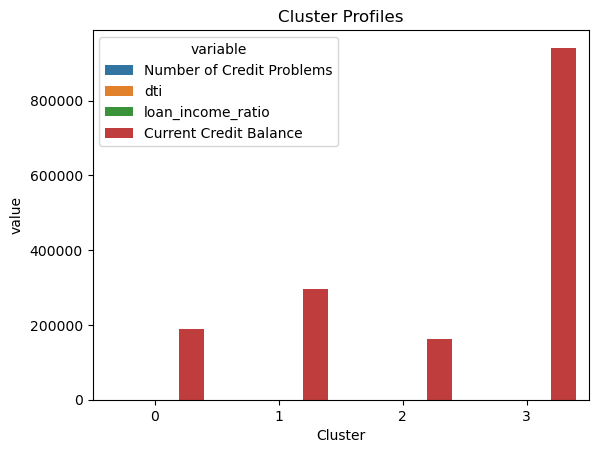

In [31]:
import seaborn as sns
cluster_profile = credit_data.groupby('Cluster')[numerical_features].mean().reset_index()
melted = cluster_profile.melt(id_vars='Cluster')
sns.barplot(x='Cluster', y='value', hue='variable', data=melted)
plt.title("Cluster Profiles")
plt.show()

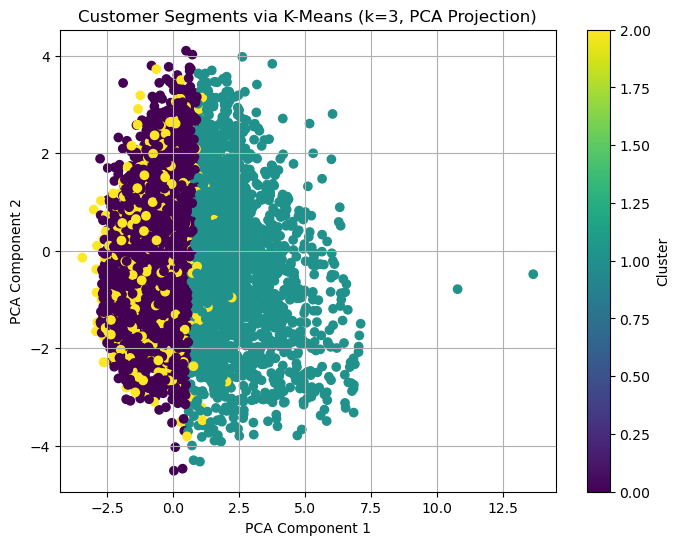

Cluster Summary:
         Credit Score  Annual Income  Monthly Debt  Number of Credit Problems  \
Cluster                                                                         
0              720.42     1111235.84      13381.34                       0.00   
1              715.68     2137506.93      33350.83                       0.03   
2              715.55     1214251.94      15361.75                       1.20   

         Current Credit Balance  credit_utilization  loan_income_ratio  dti  \
Cluster                                                                       
0                     201598.24                0.47               0.26 0.16   
1                     576833.23                0.63               0.24 0.21   
2                     157374.30                0.43               0.23 0.16   

         dti  loan_income_ratio  credit_utilization  
Cluster                                              
0       0.16               0.26                0.47  
1       0.21       

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -------------------------
# Step 1: Feature Engineering
# -------------------------
credit_data['dti'] = credit_data['Monthly Debt'] / (credit_data['Annual Income'] / 12)
credit_data['loan_income_ratio'] = credit_data['Current Loan Amount'] / credit_data['Annual Income']
credit_data['credit_utilization'] = credit_data['Current Credit Balance'] / credit_data['Maximum Open Credit']
credit_data['has_bankruptcies'] = (credit_data['Bankruptcies'] > 0).astype(int)
credit_data['has_tax_liens'] = (credit_data['Tax Liens'] > 0).astype(int)


credit_data = credit_data.replace([float('inf'), -float('inf')], pd.NA)
credit_data.dropna(subset=numerical_features + categorical_features, inplace=True)

# -------------------------
# Step 2: Define features
# -------------------------
numerical_features = [
    'Credit Score', 'Annual Income', 'Monthly Debt',
    'Number of Credit Problems', 'Current Credit Balance',
    'credit_utilization', 'loan_income_ratio', 'dti'
]

categorical_features = [
    'Term', 'Years in current job', 'Home Ownership', 'Purpose'
]

# -------------------------
# Step 3: Preprocessing
# -------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# -------------------------
# Step 4: Build pipeline with KMeans (k=3)
# -------------------------
kmeans_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('cluster', KMeans(n_clusters=3, random_state=42))
])

# -------------------------
# Step 5: Fit model & assign cluster
# -------------------------
kmeans_pipeline.fit(credit_data)
credit_data['Cluster'] = kmeans_pipeline.named_steps['cluster'].labels_

# -------------------------
# Step 6: Visualize with PCA
# -------------------------
X_preprocessed = preprocessor.fit_transform(credit_data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=credit_data['Cluster'], cmap='viridis')
plt.title('Customer Segments via K-Means (k=3, PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# -------------------------
# Step 7: View cluster profile
# -------------------------
cluster_summary = credit_data.groupby('Cluster')[
    numerical_features + ['dti', 'loan_income_ratio', 'credit_utilization']
].mean()

print("Cluster Summary:")
print(cluster_summary)

In [33]:
print(credit_data.groupby('Cluster')['Loan Status'].value_counts(normalize=True).unstack())

Loan Status  Charged Off  Fully Paid
Cluster                             
0                   0.20        0.80
1                   0.18        0.82
2                   0.19        0.81


Silhouette Score: 0.194


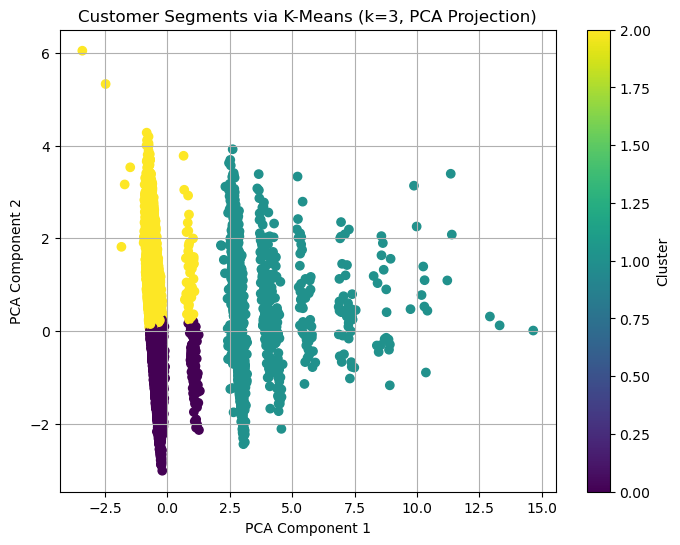


Cluster Summary:
         Credit Score  dti  loan_income_ratio  credit_utilization  \
Cluster                                                             
0              729.27 0.14               0.18                0.47   
1              715.21 0.16               0.23                0.44   
2              705.40 0.22               0.35                0.58   

         Number of Credit Problems  has_bankruptcies  has_tax_liens  
Cluster                                                              
0                             0.02              0.00           0.00  
1                             1.21              0.87           0.15  
2                             0.01              0.00           0.00  

Default Rate by Cluster:
Loan Status  Charged Off  Fully Paid
Cluster                             
0                   0.15        0.85
1                   0.19        0.81
2                   0.25        0.75


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# ------------------------------------------
# Step 1: Feature Engineering
# ------------------------------------------
credit_data['dti'] = credit_data['Monthly Debt'] / (credit_data['Annual Income'].replace(0, pd.NA) / 12)
credit_data['loan_income_ratio'] = credit_data['Current Loan Amount'] / credit_data['Annual Income'].replace(0, pd.NA)
credit_data['credit_utilization'] = credit_data['Current Credit Balance'] / credit_data['Maximum Open Credit'].replace(0, pd.NA)
credit_data['has_bankruptcies'] = (credit_data['Bankruptcies'] > 0).astype(int)
credit_data['has_tax_liens'] = (credit_data['Tax Liens'] > 0).astype(int)

# ------------------------------------------
# Step 2: Clean and drop rows with NaN/inf
# ------------------------------------------
credit_data = credit_data.replace([float('inf'), -float('inf')], pd.NA)
credit_data.dropna(subset=[
    'Credit Score', 'Monthly Debt', 'Annual Income', 'Current Loan Amount',
    'Current Credit Balance', 'Maximum Open Credit'
], inplace=True)

# ------------------------------------------
# Step 3: Define features
# ------------------------------------------
numerical_features = [
    'Credit Score', 'dti', 'loan_income_ratio', 'credit_utilization',
    'Number of Credit Problems', 'has_bankruptcies', 'has_tax_liens'
]
categorical_features = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# ------------------------------------------
# Step 4: Preprocessing pipeline
# ------------------------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# ------------------------------------------
# Step 5: Build and fit KMeans pipeline
# ------------------------------------------
kmeans_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('cluster', KMeans(n_clusters=3, random_state=42))
])

kmeans_pipeline.fit(credit_data)
credit_data['Cluster'] = kmeans_pipeline.named_steps['cluster'].labels_

# ------------------------------------------
# Step 6: Evaluate cluster quality
# ------------------------------------------
X_preprocessed = preprocessor.fit_transform(credit_data)
silhouette = silhouette_score(X_preprocessed, credit_data['Cluster'])
print(f"Silhouette Score: {silhouette:.3f}")

# ------------------------------------------
# Step 7: Visualize using PCA
# ------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=credit_data['Cluster'], cmap='viridis')
plt.title('Customer Segments via K-Means (k=3, PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# ------------------------------------------
# Step 8: Cluster profile summary
# ------------------------------------------
summary = credit_data.groupby('Cluster')[numerical_features].mean()
print("\nCluster Summary:")
print(summary)

# Optional: Check default rate by cluster
if 'Loan Status' in credit_data.columns:
    print("\nDefault Rate by Cluster:")
    print(credit_data.groupby('Cluster')['Loan Status'].value_counts(normalize=True).unstack())